In [1]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
all_transcripts = pd.read_csv('tables/all_transcripts')
emotions = pd.read_csv('NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 
                       names=['word', 'emotion', 'association'], skiprows=45, sep='\t')


In [3]:
new_emotions = emotions.pivot_table(values = 'association', index = 'word', columns = 'emotion')

In [4]:
new_emotions = new_emotions.fillna(0)

In [5]:
from src.text_pipeline import text_to_vector, preprocess, remove_stopwords

In [6]:
vectorizer, vector, vector_pd = text_to_vector(all_transcripts['Line'])

In [7]:
def stemmer_for_doc(arr):
    ss = SnowballStemmer(language='english')
    output = list()
    for text in arr:
        current = ""
        for word in text.split():
            current += ss.stem(word) + " "
        output.append(current)
    return output

def stemmer(arr):
    ss = SnowballStemmer(language='english')
    output = list()
    for text in arr:
        current = ""
        for word in str(text).split():
            current += ss.stem(word)
        output.append(current)
    return output

In [8]:
all_transcripts['processed'] = stemmer_for_doc(remove_stopwords(all_transcripts['Line']))

In [9]:
new_emotions.index = (stemmer(new_emotions.index))

In [10]:
new_emotions.reset_index(inplace=True)

In [11]:
new_emotions = new_emotions.rename(columns = {"index":"word"})

In [12]:
word_counts = all_transcripts.processed.str.split(expand=True).stack().value_counts()

In [13]:
word_counts_df = word_counts.to_frame(name = 'counts').reset_index()

In [14]:
word_counts_df = word_counts_df[:-1]

In [15]:
word_counts_df = word_counts_df.drop([2])

In [16]:
word_counts_df = word_counts_df.rename(columns = {"index":"word"})

In [50]:
em_model = pd.merge(new_emotions, word_counts_df, how= 'left', on='word')

In [51]:
em_model.fillna(0)

,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,counts
0,abandon,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,14.0
1,abat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abba,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,abbot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14172,zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
14173,zoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14174,zoolog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14175,zoolog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
em_model_sum = em_model.sum()[1:-1]

In [59]:
em_model_sum.sort_values

<bound method Series.sort_values of anger           1245
anticipation     839
disgust         1058
fear            1473
joy              689
negative        3322
positive        2312
sadness         1189
surprise         534
trust           1230
dtype: object>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

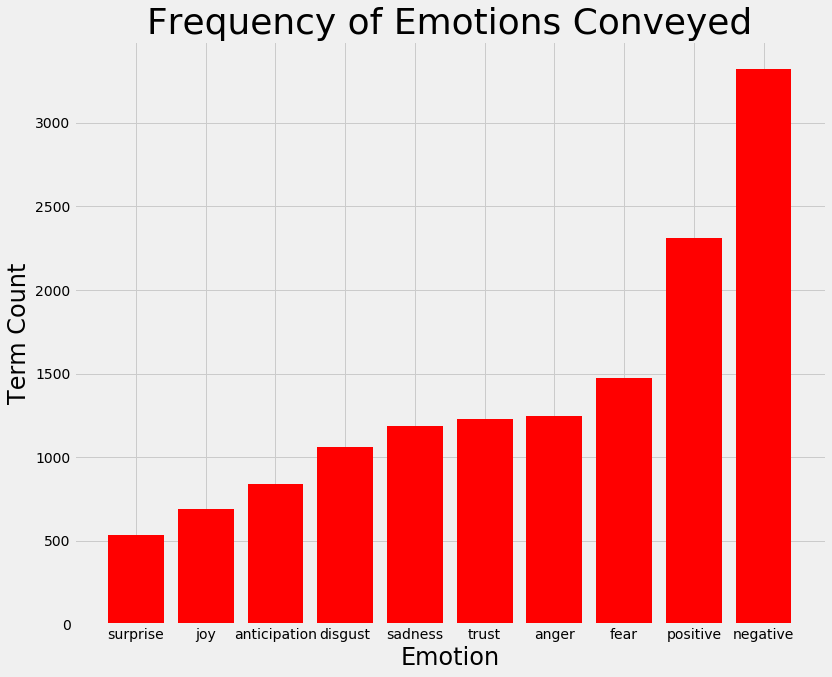

In [62]:
fig, ax = plt.subplots(figsize= (12, 10))
ax.bar(em_model_sum.sort_values().index, em_model_sum.sort_values(), color = 'r')
ax.set_title('Frequency of Emotions Conveyed', fontsize = 36)
ax.set_xlabel('Emotion', fontsize = 24)
ax.set_ylabel('Term Count', fontsize = 24)
plt.xticks(fontsize = 14)